<a href="https://colab.research.google.com/github/akshaykrishh/glasdoor-job-analysis/blob/main/glassdoorDataScienceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Glassdoor Data Science Jobs Data Analysis

Glassdoor is a website where current and former employees anonymously review companies. Glassdoor also allows users to anonymously submit and view salaries as well as search and apply for jobs on its platform.

Since more and more people use Glassdoor to search and apply for jobs in Data Science, Glassdoor becames quite popular and essential platform. I chose the data which collected by scrapping the glassdoor website for data science jobs in the United States from https://www.kaggle.com/rkb0023/glassdoor-data-science-jobs to analyze jobs in Data Science.

The data has information about Job Title, Salary Estimate, Company Location, company Size, Industry etc which are relevant for this project.

In [ ]:
project_name = "glassdoor_data_science_jobs"

In [ ]:
import re
from collections import Counter
import locale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

The first step is to load the data into a Pandas dataframe. The data I have downloaded from https://www.kaggle.com/rkb0023/glassdoor-data-science-jobs is a csv file, I have saved it and uploaded for this project.

In [ ]:
glassdoor_data_jobs_raw = pd.read_csv('glassdoor_jobs.csv')

First let's view basic information about the dataset, and also few lines of data using the .info, .head method.

In [ ]:
glassdoor_data_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1000 non-null   object 
 1   Salary Estimate    1000 non-null   object 
 2   Job Description    1000 non-null   object 
 3   Rating             1000 non-null   float64
 4   Company Name       1000 non-null   object 
 5   Location           1000 non-null   object 
 6   Headquarters       1000 non-null   object 
 7   Size               1000 non-null   object 
 8   Founded            1000 non-null   int64  
 9   Type of ownership  1000 non-null   object 
 10  Industry           1000 non-null   object 
 11  Sector             1000 non-null   object 
 12  Revenue            1000 non-null   object 
 13  Competitors        1000 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 109.5+ KB


In [ ]:
glassdoor_data_jobs_raw.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer"
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen..."
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1
5,Data Scientist,$77K-$92K (Glassdoor Est.),Job Title: Data Scientists\n\nJob Description\...,2.2,Great-Circle Technologies\n2.2,"Chantilly, VA","Chantilly, VA",1 to 50 employees,2000,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹100 to ₹500 million (INR),-1
6,Senior Data Engineer,$77K-$92K (Glassdoor Est.),"Senior Data Engineer\nLocation/City: Atlanta, ...",3.6,Steady\n3.6,"Atlanta, GA","Atlanta, GA",1 to 50 employees,2017,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
7,Data Scientist,$77K-$92K (Glassdoor Est.),Are you performance-driven and want your impac...,4.0,goTRG\n4.0,"Miami, FL","Miami, FL",501 to 1000 employees,2008,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹10 to ₹50 billion (INR),-1
8,"Associate Director, Data Science",$77K-$92K (Glassdoor Est.),About Veracyte\n\n\nVeracyte (Nasdaq: VCYT) is...,3.5,Veracyte\n3.5,"South San Francisco, CA","South San Francisco, CA",201 to 500 employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹10 to ₹50 billion (INR),-1
9,Senior Data Scientist,$77K-$92K (Glassdoor Est.),Brinks Home Security™ is a proven leader in th...,3.4,Brinks Home Security\n3.4,"Dallas, TX","Farmers Branch, TX",1001 to 5000 employees,-1,Company - Public,Security Services,Business Services,Unknown / Non-Applicable,"ADT Security Services, Protection 1"


Also retrieve the number of rows and columns in the data frame using the .shape method.

In [ ]:
print('The csv file contains', np.shape(glassdoor_data_jobs_raw)[0], 'rows and', np.shape(glassdoor_data_jobs_raw)[1], 'columns.')

The csv file contains 1000 rows and 14 columns.


In [ ]:
list(glassdoor_data_jobs_raw.columns.values)

['Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors']

What about how many missing values in the data frame?

In [ ]:
glassdoor_data_jobs_raw.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

Looks like I don't have missing values in data! Now, let's explore more to see.

## Data Preparation and Cleaning

In this section, I will create some functions to prepare and clean data for later data visilizing.

# Preparing Data

In [ ]:
def prepare_data(df):
    selected_columns = ['Job Title',
                         'Salary Estimate',
                         'Company Name',
                         'Location',
                         'Size',
                         'Type of ownership',
                         'Industry',
                         'Sector',
                        ]
    df_new = df[selected_columns].copy()
    df_new.where(~(df_new['Salary Estimate'].str.contains('Per Hour', na=False)), np.nan, inplace=True)
    df_cols = df['Salary Estimate'].dropna().str.split("-", n = 1, expand = True)
    df_new.insert(3, 'Low Salary Estimate',df_cols[0],True)
    df_new.insert(4, 'High Salary Estimate',df_cols[1],True)
    df_new['Low Salary Estimate'] = convert_to_number(df_new['Low Salary Estimate'])
    df_new['High Salary Estimate'] = convert_to_number(df_new['High Salary Estimate'])
    df_new['Average Salary Estimate'] = df_new[['Low Salary Estimate', 'High Salary Estimate']].mean(axis=1).astype(int)
    return df_new

1. This function is to prepare the dataset from raw data. As my analysis will focus on salary estimate, company size, company industry, location, it removed columns of 'Headquarters','Founded','Revenue','Competitors' which are not needed for this project.
2. In order to get average salary estimate, I have to split Average Estimate to two colunns with numbers left only, then get averge by using panadas mean() method.

In [ ]:
def convert_to_number(df_col):
    locale.setlocale( locale.LC_ALL, '' )
    df_col = df_col.dropna().map(lambda x: x.lstrip('$').replace('K','000')).map(lambda x: re.sub("[^0-9]", "", x))
    return df_col.map(lambda x: locale.atof(x)).map(lambda x: int(x))

This function is help to remove $ in the every beginning of string and removed non-numberic letters, also replaced letter 'K' to be number. The function returns column with Integer values.

In [ ]:
def get_data_copy():
    glassdoor_data_jobs = prepare_data(glassdoor_data_jobs_raw)
    return glassdoor_data_jobs

This funtion is to get prepared dataset, then I will just call it in later invoke.
Let's see the dataset looks like by using pandas sample method.

In [ ]:
get_data_copy().sample(5)

,Job Title,Salary Estimate,Company Name,Low Salary Estimate,High Salary Estimate,Location,Size,Type of ownership,Industry,Sector,Average Salary Estimate
809,Data Scientist,$81K-$102K (Glassdoor Est.),Wish\n3.5,81000,102000,"Seattle, WA",501 to 1000 employees,Company - Private,Other Retail Shops,Retail,91500
963,Data Scientist,$105K-$138K (Glassdoor Est.),TransReach,105000,138000,"San Francisco, CA",Unknown,Company - Private,-1,-1,121500
695,Data Scientist,$112K-$149K (Glassdoor Est.),Visionary Integration Professionals\n4.3,112000,149000,"Washington, DC",501 to 1000 employees,Company - Private,IT Services,Information Technology,130500
380,Analytical Associate Scientist,$110K-$145K (Glassdoor Est.),GSK\n3.9,110000,145000,"Richmond, VA",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,127500
28,Report Writer-Data Analyst,$77K-$92K (Glassdoor Est.),Security Finance Corporation of Spartanburg\n3.4,77000,92000,"Spartanburg, SC",1001 to 5000 employees,Company - Private,Lending,Finance,84500


## Exploratory Analysis and Visualization

Now I have prepared disired dataset I need, my next step is to analyze and clean data that I will need to do statistical analysis and answer some research questions. In this section, I will also create some funtions which will help to process data for visualizing.

### -- Company Size in Data Science
First, Let's see data science jobs based on company size.

In [ ]:
get_data_copy().Size.unique().tolist()

['51 to 200 employees',
 '5001 to 10000 employees',
 '10000+ employees',
 '501 to 1000 employees',
 '1001 to 5000 employees',
 '1 to 50 employees',
 '201 to 500 employees',
 'Unknown',
 nan,
 '-1']

In [ ]:
def get_company_size_data_summary(df):
    return df[(df.Size != '-1' ) & (df.Size != 'Unknown')]

As you can see from company size, there's unwanted data which are 'Unknown' and '-1'. This function is to remove them and returns new dataset.

### -- Company Type in Data Science
Let's see data science jobs based on company Type.

In [ ]:
get_data_copy()['Type of ownership'].unique().tolist()

['Company - Private',
 'Company - Public',
 'Government',
 'Subsidiary or Business Segment',
 'Non-profit Organisation',
 'Private Practice / Firm',
 'Hospital',
 nan,
 'Other Organisation',
 '-1',
 'Unknown',
 'College / University',
 'Contract']

In [ ]:
def get_company_type_summary(df):
    df.dropna()
    col_series = df['Type of ownership'].value_counts()
    result_df = col_series.to_frame()
    sum1 = 0
    sum2 = 0
    for idx, value  in col_series.iteritems():
        if 0 < value < 10:
            result_df.at[idx, :] = 0
            sum1 = sum1 + value
            result_df.at['Others', :] = sum1
        if 10 <= value < 30:
            result_df.at[idx, :] = 0
            sum2 = sum2 + value
            result_df.at['Not Sure', :] = sum2
    result_df = result_df[(result_df['Type of ownership'] != 0)]
    return result_df.iloc[:,0]

1. In 'Type of ownership', there's unwanted data which are 'Unknown' and '-1' and nan.
2. Also in function, I changed 'Unknown' and '-1' and nan to be 'Ohters' and 'Not Sure' based on values.

In [ ]:
company_type_summary = get_company_type_summary(get_data_copy())
company_type_summary

Company - Private                 541.0
Company - Public                  271.0
Non-profit Organisation            48.0
Subsidiary or Business Segment     40.0
Not Sure                           37.0
Others                             33.0
Name: Type of ownership, dtype: float64

Now, I have more clear data for company type.

### -- Industry Distribution in Data Science

In [ ]:
get_data_copy().Industry.unique().tolist()

['Advertising & Marketing',
 'Research & Development',
 'Biotech & Pharmaceuticals',
 'Healthcare Services & Hospitals',
 'Government Agencies',
 'Enterprise Software & Network Solutions',
 'Internet',
 'Security Services',
 'Food & Drink Manufacturing',
 'Insurance Operators',
 'Consulting',
 'Lending',
 'Chemical Manufacturing',
 'Aerospace & Defence',
 '-1',
 'Investment Banking & Asset Management',
 'IT Services',
 'Banks & Building Societies',
 'Computer Hardware & Software',
 'Colleges & Universities',
 nan,
 'Wholesale',
 'Consumer Products Manufacturing',
 'Staffing & Outsourcing',
 'Grocery Shops & Supermarkets',
 'Architectural & Engineering Services',
 'Video Games',
 'Department, Clothing, & Shoe Shops',
 'Cable, Internet & Telephone Providers',
 'Energy',
 'Beauty & Personal Accessories Shops',
 'Preschool & Child Care',
 'Utilities',
 'Transportation Management',
 'Oil & Gas Exploration & Production',
 'Consumer Product Hire',
 'Express Delivery Services',
 'Social Servic

In [ ]:
get_data_copy().Industry.value_counts()

Biotech & Pharmaceuticals                  121
IT Services                                116
-1                                          95
Enterprise Software & Network Solutions     90
Computer Hardware & Software                76
                                          ... 
Radio                                        1
Farm Support Services                        1
Brokerage Services                           1
Legal                                        1
Logistics & Supply Chain                     1
Name: Industry, Length: 72, dtype: int64

There's '-1' in dataset, I will need to remove it in case it will cause any misleading.

In [ ]:
def get_company_industry_summary(df):
    df.dropna()
    col_series = df.Industry.value_counts()
    result_df = col_series.to_frame()
    total = 0
    for idx, value  in col_series.iteritems():
        if value < 5:
            result_df.at[idx, :] = 0
            total = total + value
            result_df.at['Others', :] = total
    result_df = result_df[(result_df.Industry != 0)]
    return result_df.iloc[:,0].astype(int).drop(labels=['-1'])

In [ ]:
company_industry_summary = get_company_industry_summary(get_data_copy())
company_industry_summary

Biotech & Pharmaceuticals                  121
IT Services                                116
Enterprise Software & Network Solutions     90
Computer Hardware & Software                76
Internet                                    45
Healthcare Services & Hospitals             45
Staffing & Outsourcing                      44
Consulting                                  42
Insurance Operators                         40
Aerospace & Defence                         25
Banks & Building Societies                  23
Investment Banking & Asset Management       22
Advertising & Marketing                     19
Government Agencies                         14
Research & Development                      11
Lending                                     10
Colleges & Universities                      8
Consumer Products Manufacturing              8
Architectural & Engineering Services         7
Utilities                                    6
Food & Drink Manufacturing                   6
Video Games  

Now, unwanted data got cleaned.

### -- Location Distribution in Data Science
Let's visualize the company Location in data science from given dataset.

In [ ]:
get_data_copy().Location.unique().tolist()

['New York, NY',
 'Chantilly, VA',
 'Cambridge, MA',
 'Overland Park, KS',
 'San Francisco, CA',
 'Atlanta, GA',
 'Miami, FL',
 'South San Francisco, CA',
 'Dallas, TX',
 'New Jersey',
 'Oregon',
 'Chevy Chase, MD',
 'Scotts Valley, CA',
 'Boston, MA',
 'Lehi, UT',
 'Naperville, IL',
 'Herndon, VA',
 'New Bedford, MA',
 'Denver, CO',
 'Alexandria, VA',
 'Hill AFB, UT',
 'Salt Lake City, UT',
 'Woodbridge, NJ',
 'Spartanburg, SC',
 'Ipswich, MA',
 'Lexington, MA',
 'Akron, OH',
 'Bedford, MA',
 'Madison, WI',
 'Hoboken, NJ',
 'Milwaukee, WI',
 'Pittsburgh, PA',
 'Reston, VA',
 'Waltham, MA',
 'Gardnerville, NV',
 'Washington, DC',
 'Bridgeport, WV',
 'Seattle, WA',
 'Newton, MA',
 'White Sands Missile Range, NM',
 'Santa Clara, CA',
 'San Jose, CA',
 'Los Angeles, CA',
 'Smithfield, RI',
 nan,
 'Saint Louis, MO',
 'Irvine, CA',
 'San Diego, CA',
 'Centennial, CO',
 'Sheboygan, WI',
 'Chicago, IL',
 'Morrisville, NC',
 'Cincinnati, OH',
 'Provo, UT',
 'Annapolis Junction, MD',
 'Detroit,

In [ ]:
def get_company_location_data_summary(df):
    return df.Location.dropna().value_counts().head(10)

In [ ]:
company_location_summary = get_company_location_data_summary(get_data_copy())
company_location_summary

New York, NY         62
San Francisco, CA    62
Cambridge, MA        37
Seattle, WA          31
Washington, DC       25
Chicago, IL          25
Boston, MA           24
Pittsburgh, PA       17
Atlanta, GA          14
Richmond, VA         13
Name: Location, dtype: int64

# Data Visualization

### -- Company Size in Data Science
I have created funtion get_company_size_data_summary which is use to visualize the company size in data science from given dataset by horizontal bar plot.

In [ ]:
company_size_summary = get_company_size_data_summary(get_data_copy())

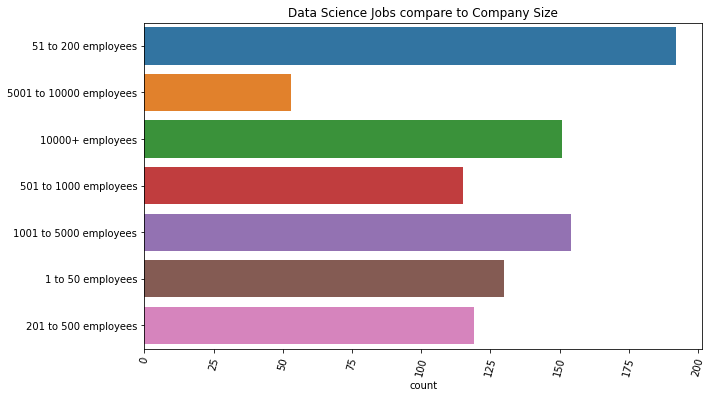

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y=company_size_summary.Size)
plt.xticks(rotation=75);
plt.title('Data Science Jobs compare to Company Size')
plt.ylabel(None);

It seems like more data science jobs in size of '51-200 employees', less in '5001-10000 employees'.

### -- Average Salary compare to Company Size in Data Science
How about average salary estimate against company size? I can plot this information using a horizontal bar chart.

In [ ]:
company_size_salary_summary = get_company_size_data_summary(get_data_copy())

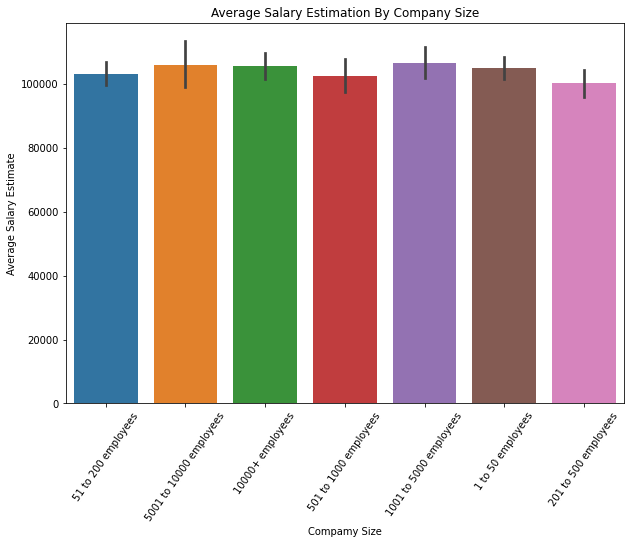

In [ ]:
plt.figure(figsize=(10, 7))
plt.xticks(rotation=55)
sns.barplot(x="Size", y="Average Salary Estimate", data=company_size_salary_summary)
plt.title("Average Salary Estimation By Company Size");
plt.xlabel('Compamy Size');

There's no very big different for how much the companys pays for data science jobs based on analysis.

### -- Company Type in Data Science
Let's visualize the company type in data science from given dataset by pie plot.

In [ ]:
company_type_summary = get_company_type_summary(get_data_copy())
company_type_summary

Company - Private                 541.0
Company - Public                  271.0
Non-profit Organisation            48.0
Subsidiary or Business Segment     40.0
Not Sure                           37.0
Others                             33.0
Name: Type of ownership, dtype: float64

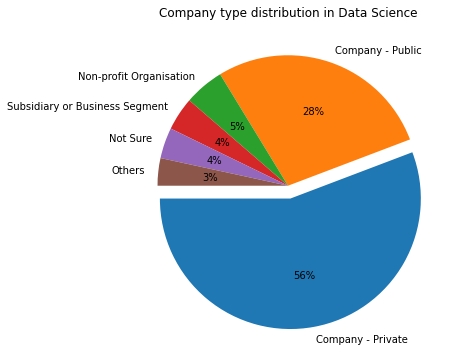

In [ ]:
plt.figure(figsize=(12,6))
explode = (0.1, 0, 0, 0, 0, 0) 
plt.title('Company type distribution in Data Science')
plt.pie(company_type_summary, labels=company_type_summary.index, explode=explode,autopct='%.f%%', shadow=False, radius = 1, startangle=180);

Apparently, private manys requie more data science relevant jobs than other types company.

### -- Industry Distribution in Data Science

In [ ]:
company_industry_summary = get_company_industry_summary(get_data_copy())

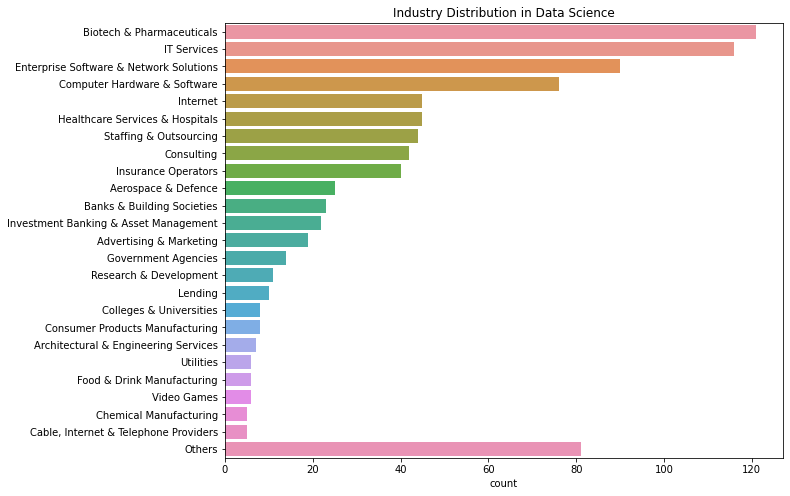

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(company_industry_summary, company_industry_summary.index)
plt.title("Industry Distribution in Data Science");
plt.xlabel('count');

Many industires need data science relevant jobs, especially in Biotech, IT, Softwar & hardware.

### -- Location Distribution in Data Science

In [ ]:
top10_company_location_summary = get_company_location_data_summary(get_data_copy())

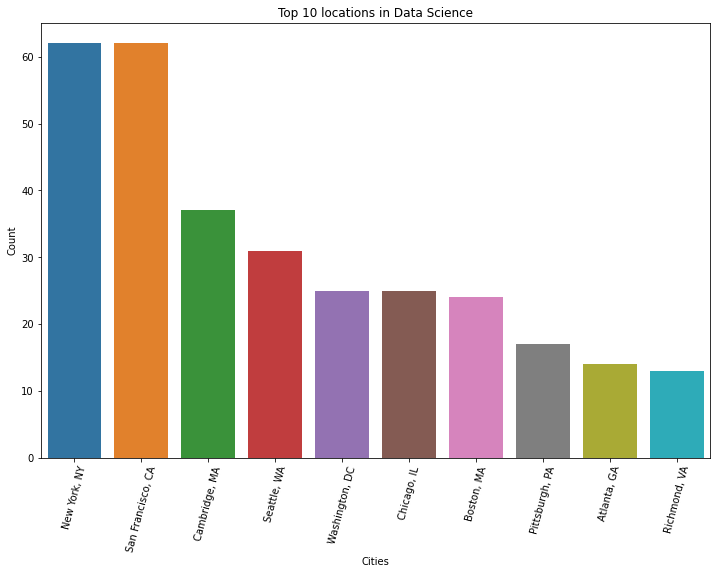

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(top10_company_location_summary.index, top10_company_location_summary)
plt.xticks(rotation=75)
plt.title("Top 10 locations in Data Science")
plt.ylabel('Count');
plt.xlabel('Cities');

Looks new York, NY and San Francissco CA, in USA have more data science relevant jobs.

## Asking and Answering Questions

#### Q1. Which state most popular for data science jobs?

In [ ]:
def get_most_popular_state(df, col_name):
    max_value = np.max(df[col_name], axis=0)
    new_df = df[df[col_name] ==  max_value].Location.tolist()
    states = []
    for item in new_df:
        lst = item.split(', ')
        if(len(lst) > 1): 
            states.append(lst[1])
    return Counter(states).most_common(1)[0]

most_common,num_most_common =  get_most_popular_state(get_company_size_data_summary(get_data_copy()), 'High Salary Estimate')

print('The most popular state for data science jobs is', most_common)

The most popular state for data science jobs is CA


#### Q2. What's the most common title for data science jobs?

In [ ]:
common_job_title = get_data_copy()['Job Title'].value_counts().head(1)
print('The most common title for data science jobs is', common_job_title.index.values.tolist()[0])

The most common title for data science jobs is Data Scientist


#### Q3. What's the distributions of top 5 industires of data science jobs?

In [ ]:
top5_industries_data_science = get_company_industry_summary(get_data_copy()).head(5).index.values.tolist()
print('The top 5 industries in data science jobs are: \n')
list(map(lambda x:print(x),top5_industries_data_science))

The top 5 industries in data science jobs are: 

Biotech & Pharmaceuticals
IT Services
Enterprise Software & Network Solutions
Computer Hardware & Software
Internet


[None, None, None, None, None]

#### Q4. What's the average salary estimate in private company?

In [ ]:
avg_salary_private_company = get_data_copy()['Average Salary Estimate'][get_data_copy()['Type of ownership'] == 'Company - Private'].mean()
print('The Average salary estimate in private company is', int(avg_salary_private_company))

The Average salary estimate in private company is 104271


#### Q5. What's the average salary estimate under 100 employees?

In [ ]:
avg_company = get_company_size_data_summary(get_data_copy())
avg_company_51_200 = avg_company['Average Salary Estimate'][get_data_copy().Size == '51 to 200 employees'].mean()
avg_company_1_50 = avg_company['Average Salary Estimate'][get_data_copy().Size == '1 to 50 employees'].mean()
avg_salary = (avg_company_51_200 + avg_company_1_50) / 2
print('The Average salary estimate in under 200 employees company is', int((avg_company_51_200 + avg_company_1_50) / 2))

The Average salary estimate in under 200 employees company is 103987


## Inferences and Conclusion

1. Company size may not impact size of data science jobs from this dataset.
2. Salary for data science jobs may similar in company size. It doesn't look salary increases based on company sizes.
3. Private company abviously hires more data science relevant jobs than other company types.
4. Mainly data science related jobs are focus on IT, BioTech, Software and hardware, then heathcare. But many in dustries want data science jobs.
5. People looks like go big cities according to analysis, such as New York, LA.
6. This analysis can be limited as study use as result may not accurate enough which causes misunderstanding.

## References

1. Data Analysis with Python:https://jovian.ml/ph17d035/python-pandas-data-analysis
2. Pandas: https://pandas.pydata.org/docs/user_guide/index.html
3. Numpy: https://numpy.org/devdocs/user/quickstart.html
4. Matplotlib: https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html
5. Seaborn: https://seaborn.pydata.org/examples/index.html